In [1]:
import numpy as np # Utilisé pour les opérations numériques avancées sur les tableaux (arrays).
import pandas as pd # Utilisé pour la manipulation et l'analyse de données, notamment avec les DataFrames.
import matplotlib.pyplot as plt # Utilisé pour créer des visualisations de données statiques, comme des graphiques en lignes, des histogrammes, etc.
import plotly.express as px # Utilisé pour créer des visualisations interactives et dynamiques.
import seaborn as sns # Basé sur matplotlib, utilisé pour créer des visualisations statistiques plus sophistiquées.

# data nettoyage

In [2]:
df = pd.read_excel('news_requests.xlsx') #Téléchargez le fichier news_requests.xlsx.

In [3]:
df.head()

,titre de news,Heure,type_news,joure,moi,ans,Date
0,مهرجان فاس للثقافة الصوفية: الفرنسي أوريليان ب...,19:47:00,art-et-culture,24.0,4,2024,4/24/2024
1,مهرجان فاس للثقافة الصوفية: استعراض الدور البا...,20:20:00,art-et-culture,22.0,4,2024,4/22/2024
2,عرض فني بباب الماكينة في افتتاح فعاليات مهرجان...,14:50:00,art-et-culture,21.0,4,2024,4/21/2024
3,أسبوع الإيسيسكو الثقافي بمراكش يحتفي بالمكانة ...,10:16:00,art-et-culture,21.0,4,2024,4/21/2024
4,مهرجان تطوان لسينما البحر الأبيض المتوسط: 12 ف...,15:49:00,art-et-culture,20.0,4,2024,4/20/2024


In [4]:
df.tail()

,titre de news,Heure,type_news,joure,moi,ans,Date
8055,المرابط: الموجة الثالثة,10 يناير 2022,صحة,NaN,“جد,سريعة,“جد//سريعة
8056,تسجيل 148 إصابة جديدة ونحو 5,17 11 2021,صحة,NaN,22,مليون,NaN
8057,أزيد من 5,4 11 2021,صحة,NaN,1,مليون,NaN
8058,المغرب : عدد المطعمين بالجرعة الثالثة من اللقا...,3 11 2021,صحة,NaN,NaN,NaN,NaN
8059,437 إصابة جديدة بكوفيد 19,و13 وفاة,صحة,NaN,و572,حالة,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8060 entries, 0 to 8059
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titre de news  8060 non-null   object 
 1   Heure          8059 non-null   object 
 2   type_news      8056 non-null   object 
 3   joure          8016 non-null   float64
 4   moi            8055 non-null   object 
 5   ans            8052 non-null   object 
 6   Date           8056 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.9+ KB


In [6]:
# Supprime toutes les lignes du DataFrame qui contiennent au moins une valeur manquante (NaN)
df = df.dropna()

# Supprime toutes les colonnes du DataFrame qui contiennent au moins une valeur manquante (NaN)
df = df.dropna(axis=1)

In [7]:
# Filtrer les dates invalides
invalid_dates = df['Date'][pd.to_datetime(df['Date'], errors='coerce').notna()]
# Filtrer les dates invalides
print(invalid_dates)

3937    مليون/1/سائح
4956    مليون/2/مقعد
Name: Date, dtype: object


In [8]:
# Supprimer les lignes avec des dates invalides
df = df[pd.to_datetime(df['Date'], errors='coerce').notna()]

In [9]:
# Convertir la colonne 'Date' en objets datetime
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Filtrer les lignes où la colonne 'joure' ne peut pas être convertie en numérique et supprimer les lignes correspondantes
df = df[pd.to_numeric(df['joure'], errors='coerce').notna()]

# Filtrer les lignes où la colonne 'moi' ne peut pas être convertie en numérique et supprimer les lignes correspondantes
df = df[pd.to_numeric(df['moi'], errors='coerce').notna()]

# Filtrer les lignes où la colonne 'ans' ne peut pas être convertie en numérique et supprimer les lignes correspondantes
df = df[pd.to_numeric(df['ans'], errors='coerce').notna()]

# Supprimer les caractères non numériques de la colonne 'joure'
df['joure'] = df['joure'].replace(r'\D', '', regex=True)

# Convertir la colonne 'joure' en valeurs numériques, en traitant les erreurs comme NaN
df['joure'] = pd.to_numeric(df['joure'], errors='coerce')


In [11]:
# Convertir la colonne 'Date' en objets datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convertir la colonne 'ans' en entiers
df['ans'] = df['ans'].astype(int)

# Convertir la colonne 'moi' en entiers
df['moi'] = df['moi'].astype(int)

# Convertir la colonne 'joure' en entiers
df['joure'] = df['joure'].astype(int)

# Convertir la colonne 'Heure' en objets datetime
df['Heure'] = pd.to_datetime(df['Heure'])


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\221872557.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Heure'] = pd.to_datetime(df['Heure'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   titre de news  8014 non-null   object        
 1   Heure          8014 non-null   datetime64[ns]
 2   type_news      8014 non-null   object        
 3   joure          8014 non-null   int32         
 4   moi            8014 non-null   int32         
 5   ans            8014 non-null   int32         
 6   Date           8014 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(3), object(2)
memory usage: 407.0+ KB


In [13]:
df.tail()

,titre de news,Heure,type_news,joure,moi,ans,Date
8046,المركز الاستشفائي الجامعي محمد السادس بطنجة.. ...,2024-06-06 19:50:00,صحة,28,4,2023,2023-04-28
8047,وفاة 35 شخصا في الأرجنتين بسبب حمى الضنك,2024-06-06 16:18:00,صحة,16,4,2023,2023-04-16
8048,الحكومة الهولندية تجيز الموت الرحيم بالنسبة لأ...,2024-06-06 10:14:00,صحة,15,4,2023,2023-04-15
8049,المهرجان الدولي للمديح النبوي 2023: انطلاق الن...,2024-06-06 20:32:00,صحة,14,4,2023,2023-04-14
8050,الشبكة المغربية للدفاع عن الحق في الصحة تدعو إ...,2024-06-06 12:44:00,صحة,6,4,2023,2023-04-06


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   titre de news  8014 non-null   object        
 1   Heure          8014 non-null   datetime64[ns]
 2   type_news      8014 non-null   object        
 3   joure          8014 non-null   int32         
 4   moi            8014 non-null   int32         
 5   ans            8014 non-null   int32         
 6   Date           8014 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(3), object(2)
memory usage: 407.0+ KB


In [15]:
# Renommer la colonne 'Heure' en 'time' pour descriptivité
df['time'] = df['Heure']

# Supprimer la colonne 'Heure' car elle a été renommée en 'time'
df.drop(['Heure'], axis=1, inplace=True)


In [16]:
df.head()

,titre de news,type_news,joure,moi,ans,Date,time
0,مهرجان فاس للثقافة الصوفية: الفرنسي أوريليان ب...,art-et-culture,24,4,2024,2024-04-24,2024-06-06 19:47:00
1,مهرجان فاس للثقافة الصوفية: استعراض الدور البا...,art-et-culture,22,4,2024,2024-04-22,2024-06-06 20:20:00
2,عرض فني بباب الماكينة في افتتاح فعاليات مهرجان...,art-et-culture,21,4,2024,2024-04-21,2024-06-06 14:50:00
3,أسبوع الإيسيسكو الثقافي بمراكش يحتفي بالمكانة ...,art-et-culture,21,4,2024,2024-04-21,2024-06-06 10:16:00
4,مهرجان تطوان لسينما البحر الأبيض المتوسط: 12 ف...,art-et-culture,20,4,2024,2024-04-20,2024-06-06 15:49:00


In [17]:
# Créer une nouvelle colonne 'DateTime' en combinant les colonnes 'Date' et 'time' au format 'YYYY-MM-DD HH:MM:SS'
df['DateTime'] = df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['time'].dt.strftime('%H:%M:%S')


In [18]:
# Convertir la colonne 'DateTime' en objets datetime, en traitant les valeurs invalides comme NaT (Not a Time)
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

In [19]:
# Supprimer les colonnes 'Date' et 'time' car elles ont été combinées dans la colonne 'DateTime'
df.drop(['Date', 'time'], axis=1, inplace=True)

In [20]:
df.head()

,titre de news,type_news,joure,moi,ans,DateTime
0,مهرجان فاس للثقافة الصوفية: الفرنسي أوريليان ب...,art-et-culture,24,4,2024,2024-04-24 19:47:00
1,مهرجان فاس للثقافة الصوفية: استعراض الدور البا...,art-et-culture,22,4,2024,2024-04-22 20:20:00
2,عرض فني بباب الماكينة في افتتاح فعاليات مهرجان...,art-et-culture,21,4,2024,2024-04-21 14:50:00
3,أسبوع الإيسيسكو الثقافي بمراكش يحتفي بالمكانة ...,art-et-culture,21,4,2024,2024-04-21 10:16:00
4,مهرجان تطوان لسينما البحر الأبيض المتوسط: 12 ف...,art-et-culture,20,4,2024,2024-04-20 15:49:00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   titre de news  8014 non-null   object        
 1   type_news      8014 non-null   object        
 2   joure          8014 non-null   int32         
 3   moi            8014 non-null   int32         
 4   ans            8014 non-null   int32         
 5   DateTime       8014 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 344.4+ KB


In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Créer une nouvelle colonne 'Date' contenant uniquement la date
df['Date'] = df['DateTime'].dt.date

# Créer une nouvelle colonne 'Time' contenant uniquement l'heure
df['Time'] = df['DateTime'].dt.time

In [23]:
df.head()

,titre de news,type_news,joure,moi,ans,DateTime,Date,Time
0,مهرجان فاس للثقافة الصوفية: الفرنسي أوريليان ب...,art-et-culture,24,4,2024,2024-04-24 19:47:00,2024-04-24,19:47:00
1,مهرجان فاس للثقافة الصوفية: استعراض الدور البا...,art-et-culture,22,4,2024,2024-04-22 20:20:00,2024-04-22,20:20:00
2,عرض فني بباب الماكينة في افتتاح فعاليات مهرجان...,art-et-culture,21,4,2024,2024-04-21 14:50:00,2024-04-21,14:50:00
3,أسبوع الإيسيسكو الثقافي بمراكش يحتفي بالمكانة ...,art-et-culture,21,4,2024,2024-04-21 10:16:00,2024-04-21,10:16:00
4,مهرجان تطوان لسينما البحر الأبيض المتوسط: 12 ف...,art-et-culture,20,4,2024,2024-04-20 15:49:00,2024-04-20,15:49:00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8050
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   titre de news  8014 non-null   object        
 1   type_news      8014 non-null   object        
 2   joure          8014 non-null   int32         
 3   moi            8014 non-null   int32         
 4   ans            8014 non-null   int32         
 5   DateTime       8014 non-null   datetime64[ns]
 6   Date           8014 non-null   object        
 7   Time           8014 non-null   object        
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 469.6+ KB


In [27]:
# Afficher le nombre d'occurrences de chaque valeur unique dans la colonne 'type_news'
df['type_news'].value_counts()

type_news
اخبار_وطنية       2928
المغرب-العالمي    2634
regions           1265
economie           742
art-et-culture     394
صحة                 46
politique            5
Name: count, dtype: int64

In [28]:
# Afficher le nombre d'occurrences de chaque valeur unique dans la colonne 'titre de news'
df['titre de news'].value_counts().head(10)

titre de news
أسعار صرف العملات الأجنبية مقابل الدرهم                     93
توقعات أحوال الطقس اليوم الثلاثاء بالمغرب                   47
توقعات أحوال الطقس اليوم الأربعاء بالمغرب                   41
توقعات أحوال الطقس اليوم الجمعة بالمغرب                     39
توقعات أحوال الطقس اليوم الخميس بالمغرب                     34
توقعات أحوال الطقس اليوم السبت بالمغرب                      32
أسعار صرف العملات الأجنبية مقابل الدرهم المغربي             30
توقعات أحوال الطقس اليوم الأحد بالمغرب                      29
مقاييس الأمطار المسجلة بالمملكة خلال الـ 24 ساعة الماضية    22
توقعات أحوال الطقس اليوم الإثنين بالمغرب                    20
Name: count, dtype: int64

In [29]:
df[df['titre de news'] == 'أسعار صرف العملات الأجنبية مقابل الدرهم']

,titre de news,type_news,joure,moi,ans,DateTime,Date,Time
414,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,15,4,2024,2024-04-15 10:33:00,2024-04-15,10:33:00
555,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,7,2,2024,2024-02-07 10:36:00,2024-02-07,10:36:00
585,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,22,1,2024,2024-01-22 11:52:00,2024-01-22,11:52:00
590,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,19,1,2024,2024-01-19 11:00:00,2024-01-19,11:00:00
617,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,9,1,2024,2024-01-09 10:39:00,2024-01-09,10:39:00
...,...,...,...,...,...,...,...,...
1081,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,27,4,2023,2023-04-27 10:32:00,2023-04-27,10:32:00
1085,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,25,4,2023,2023-04-25 11:03:00,2023-04-25,11:03:00
1089,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,20,4,2023,2023-04-20 14:29:00,2023-04-20,14:29:00
1109,أسعار صرف العملات الأجنبية مقابل الدرهم,economie,10,4,2023,2023-04-10 11:00:00,2023-04-10,11:00:00


In [30]:
df[df['titre de news'] == 'توقعات أحوال الطقس اليوم الثلاثاء بالمغرب']

,titre de news,type_news,joure,moi,ans,DateTime,Date,Time
2434,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,23,4,2024,2024-04-23 09:06:00,2024-04-23,09:06:00
2499,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,16,4,2024,2024-04-16 08:49:00,2024-04-16,08:49:00
2520,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,9,4,2024,2024-04-09 09:23:00,2024-04-09,09:23:00
2635,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,26,3,2024,2024-03-26 09:18:00,2024-03-26,09:18:00
2644,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,26,3,2024,2024-03-26 09:18:00,2024-03-26,09:18:00
2703,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,19,3,2024,2024-03-19 09:50:00,2024-03-19,09:50:00
2737,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,12,3,2024,2024-03-12 09:00:00,2024-03-12,09:00:00
2791,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,5,3,2024,2024-03-05 09:29:00,2024-03-05,09:29:00
2859,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,27,2,2024,2024-02-27 09:27:00,2024-02-27,09:27:00
2906,توقعات أحوال الطقس اليوم الثلاثاء بالمغرب,اخبار_وطنية,20,2,2024,2024-02-20 09:35:00,2024-02-20,09:35:00


In [25]:
# Sauvegarder le DataFrame dans un fichier Excel nommé 'resultat_Nettoyage.xlsx' sans inclure l'index
df.to_excel('resultat_Nettoyage.xlsx', index=False)

# data visuliation

<Axes: xlabel='type_news', ylabel='count'>

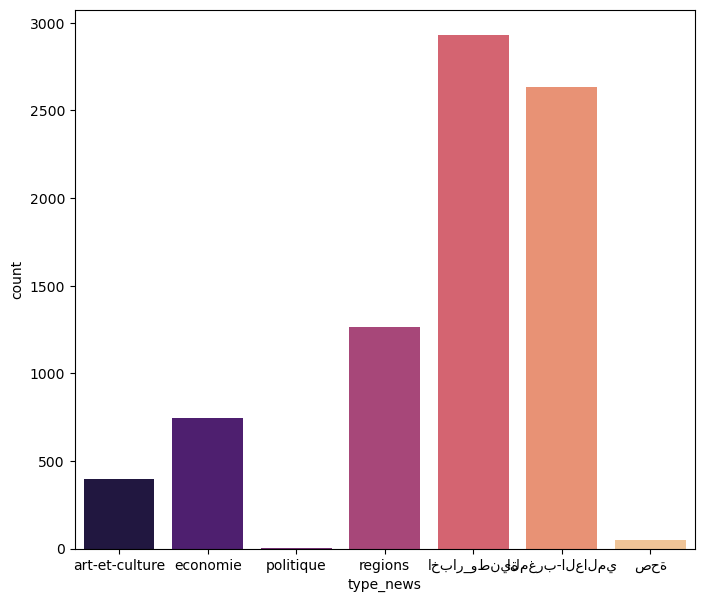

In [33]:
# Créer une figure avec une taille de 8x7 pouces
plt.figure(figsize=(8, 7))

# Afficher un countplot du nombre d'occurrences de chaque valeur unique dans la colonne 'type_news'
sns.countplot(x="type_news", data=df, palette='magma')

# Afficher le graphique
plt.show()

<Axes: xlabel='moi', ylabel='count'>

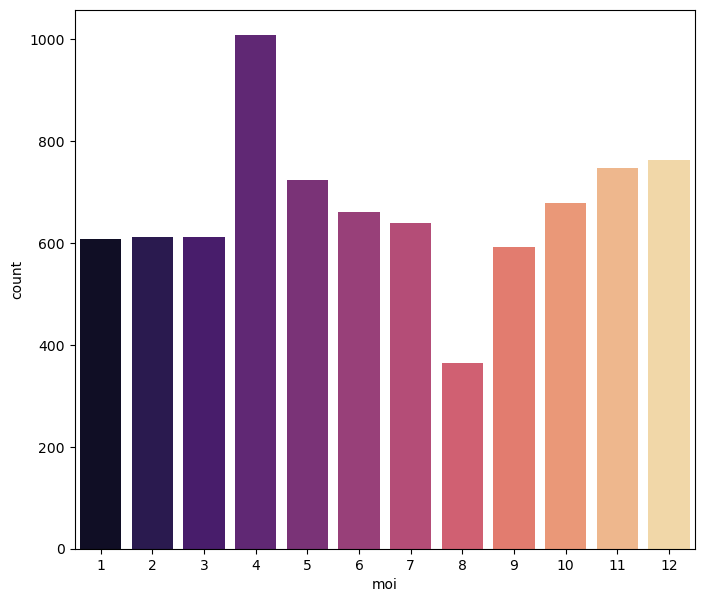

In [37]:
# Créer une figure avec une taille de 8x7 pouces
plt.figure(figsize=(8, 7))

# Afficher un countplot du nombre d'occurrences de chaque valeur unique dans la colonne 'moi'
sns.countplot(x="moi", data=df, palette='magma')

# Afficher le graphique
plt.show()

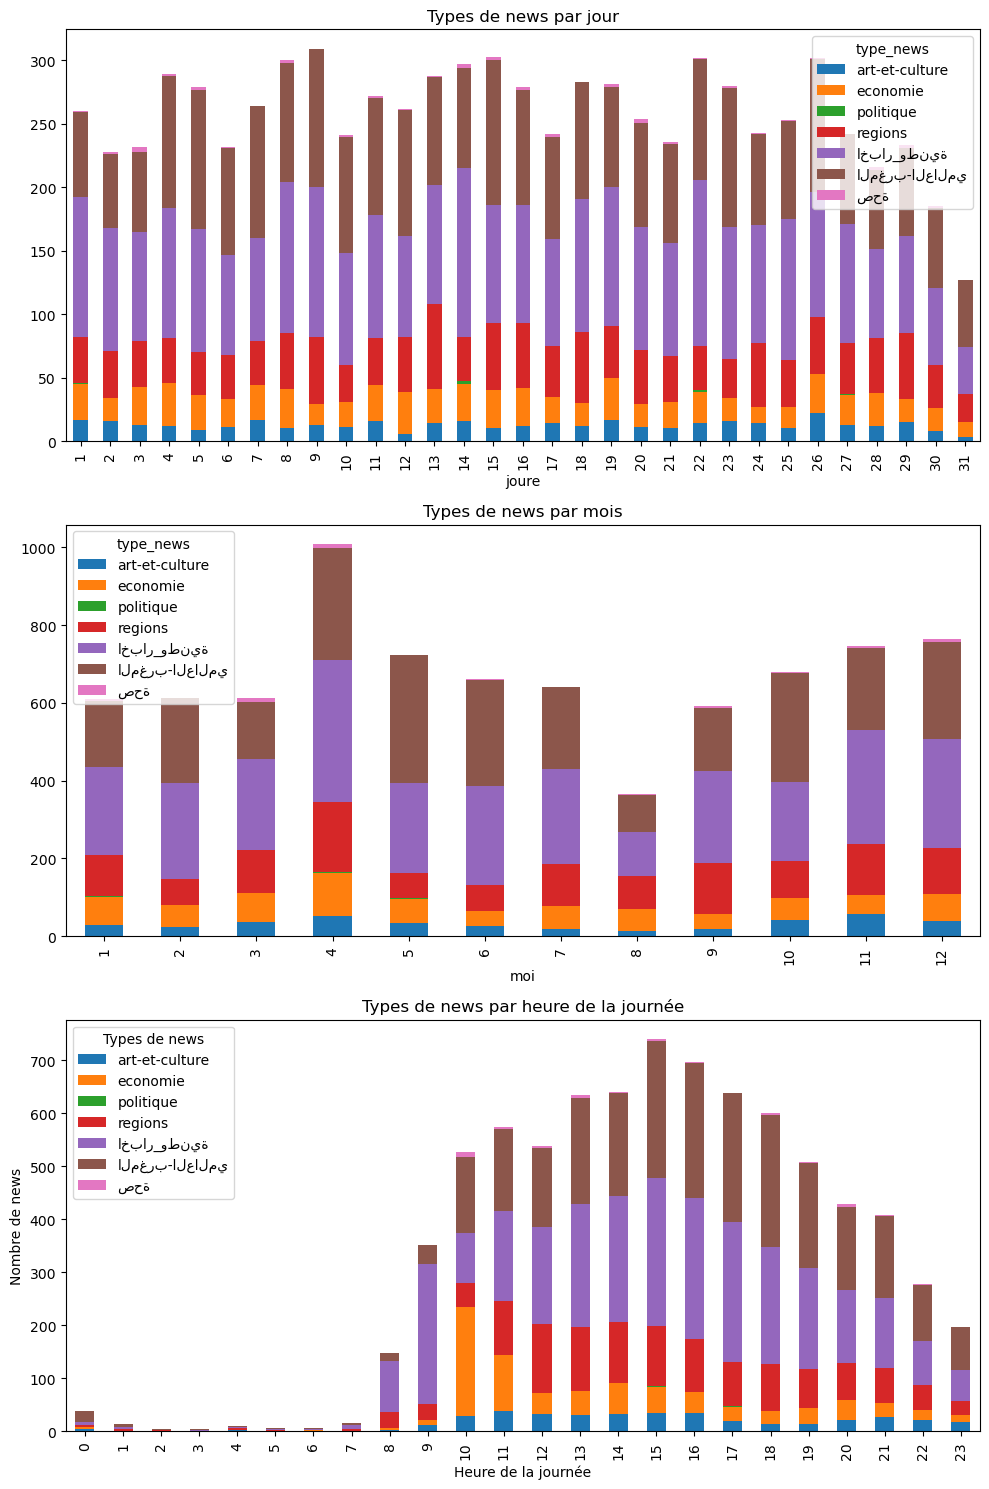

In [39]:

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df.groupby('joure')['type_news'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Types de news par jour')

# Graphique pour les types de news en fonction du mois
df.groupby('moi')['type_news'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Types de news par mois')

# Graphique pour les types de news en fonction de l'heure
df['Hour'] = df['DateTime'].dt.hour
hourly_news_counts = df.groupby(['Hour', 'type_news']).size().unstack(fill_value=0)
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Types de news par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de news')

# Récupérer les handles (les lignes colorées) et les labels de la légende
handles, labels = axes[2].get_legend_handles_labels()

# Afficher le nom de chaque type de news à côté de sa couleur correspondante
axes[2].legend(handles, labels, title='Types de news')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\3512539367.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


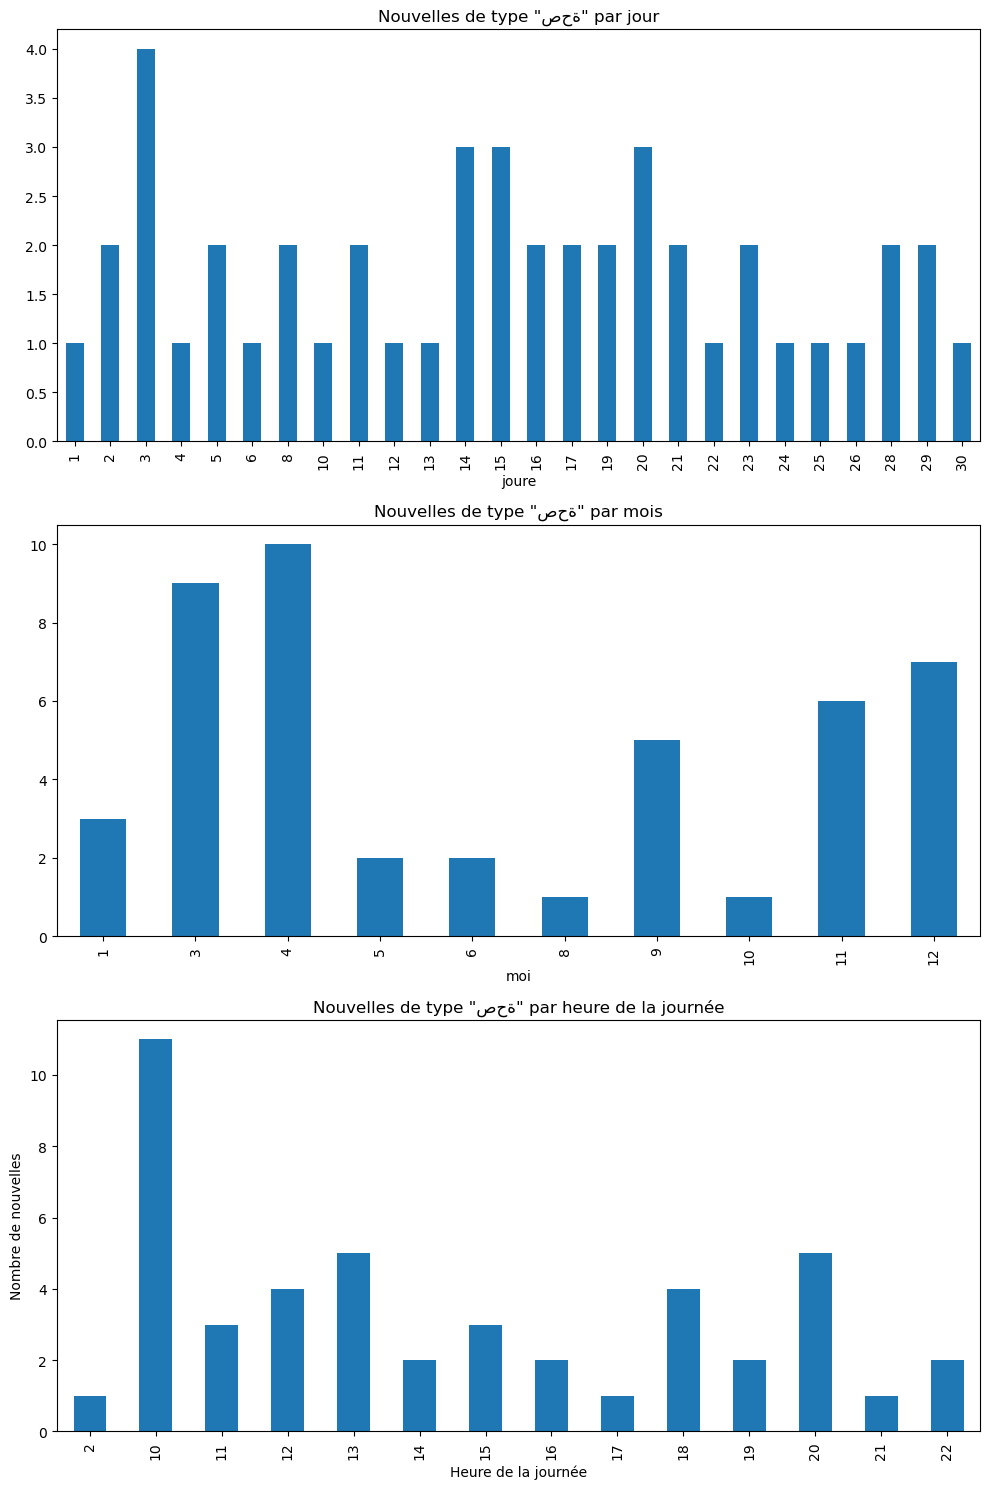

In [40]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'صحة']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "صحة" par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "صحة" par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "صحة" par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\1042137494.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


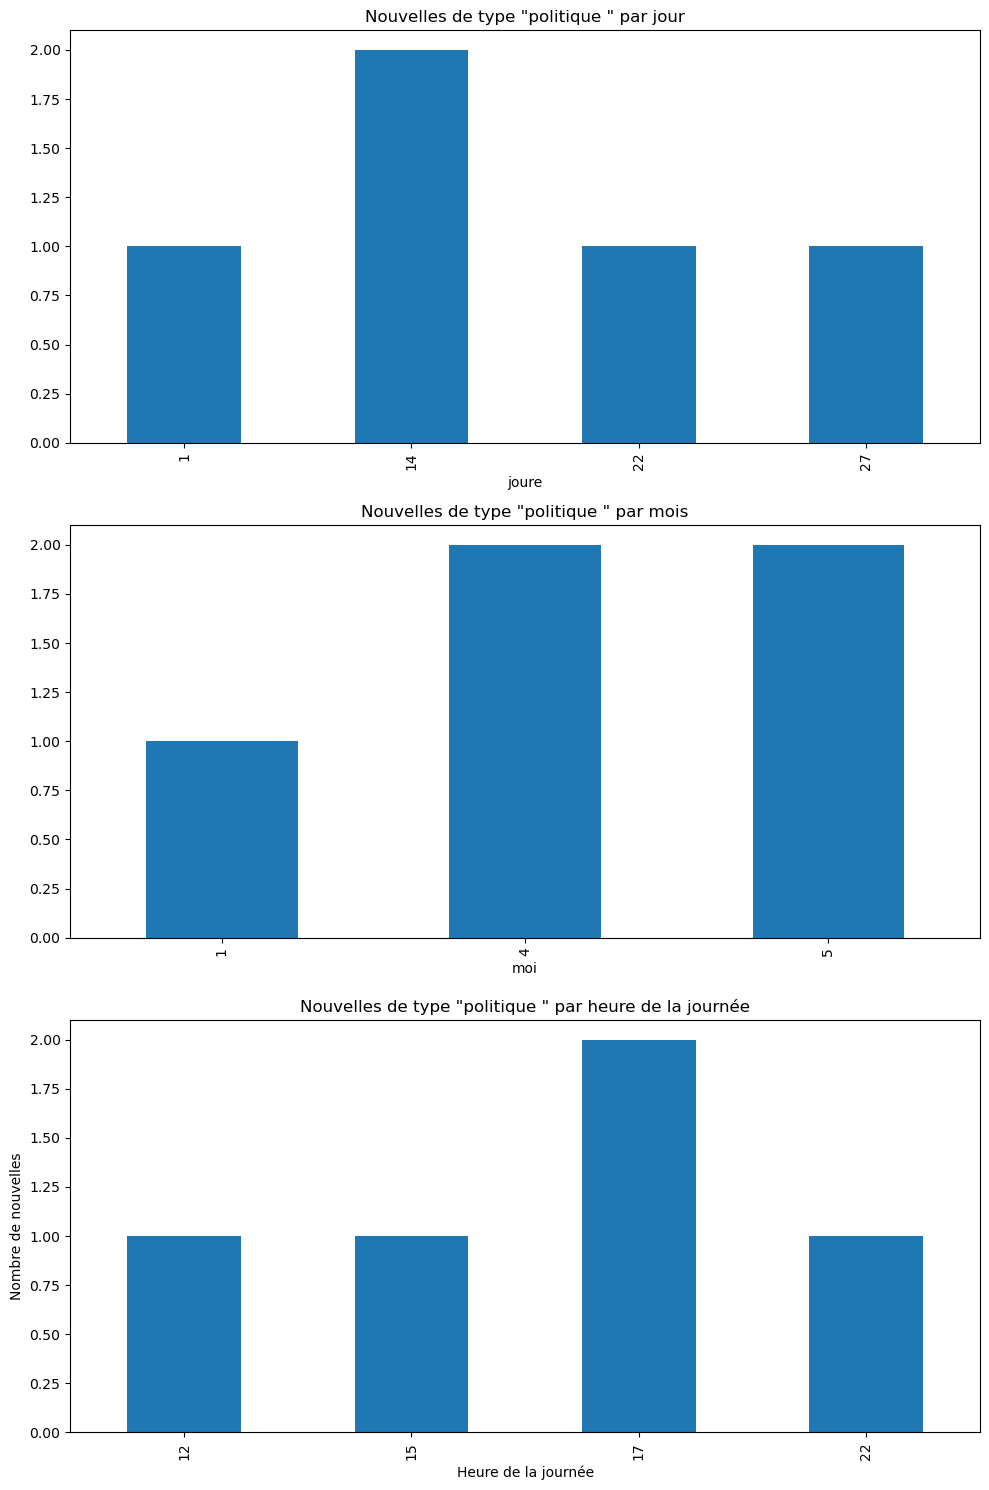

In [42]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'politique']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "politique " par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "politique " par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "politique " par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\3587493525.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


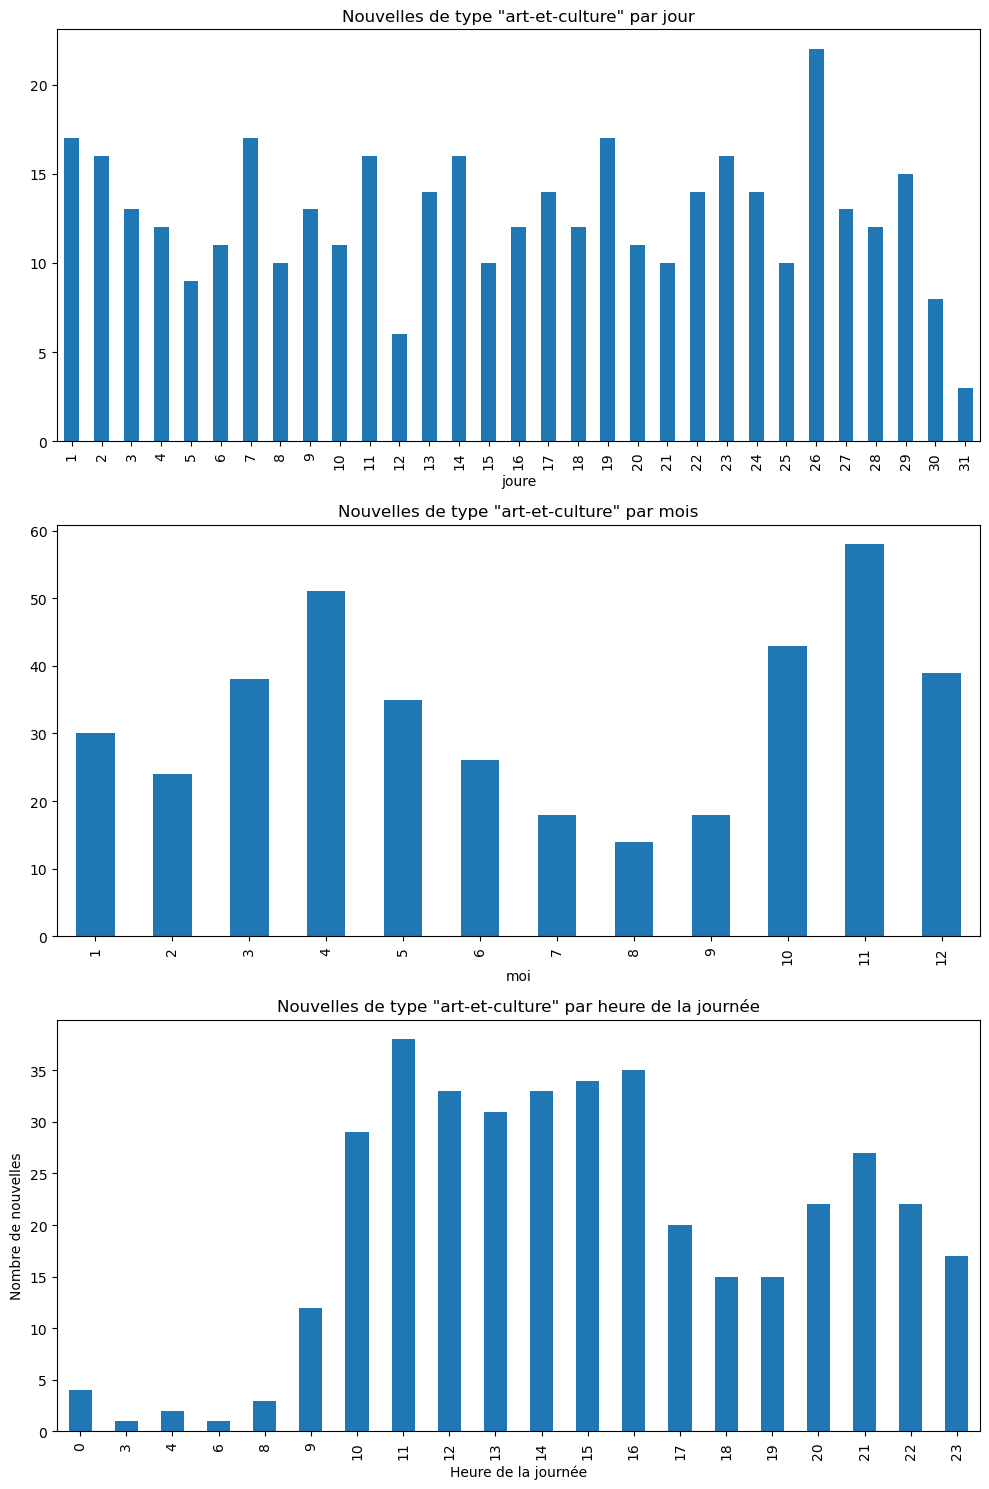

In [43]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'art-et-culture']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "art-et-culture" par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "art-et-culture" par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "art-et-culture" par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\92394715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


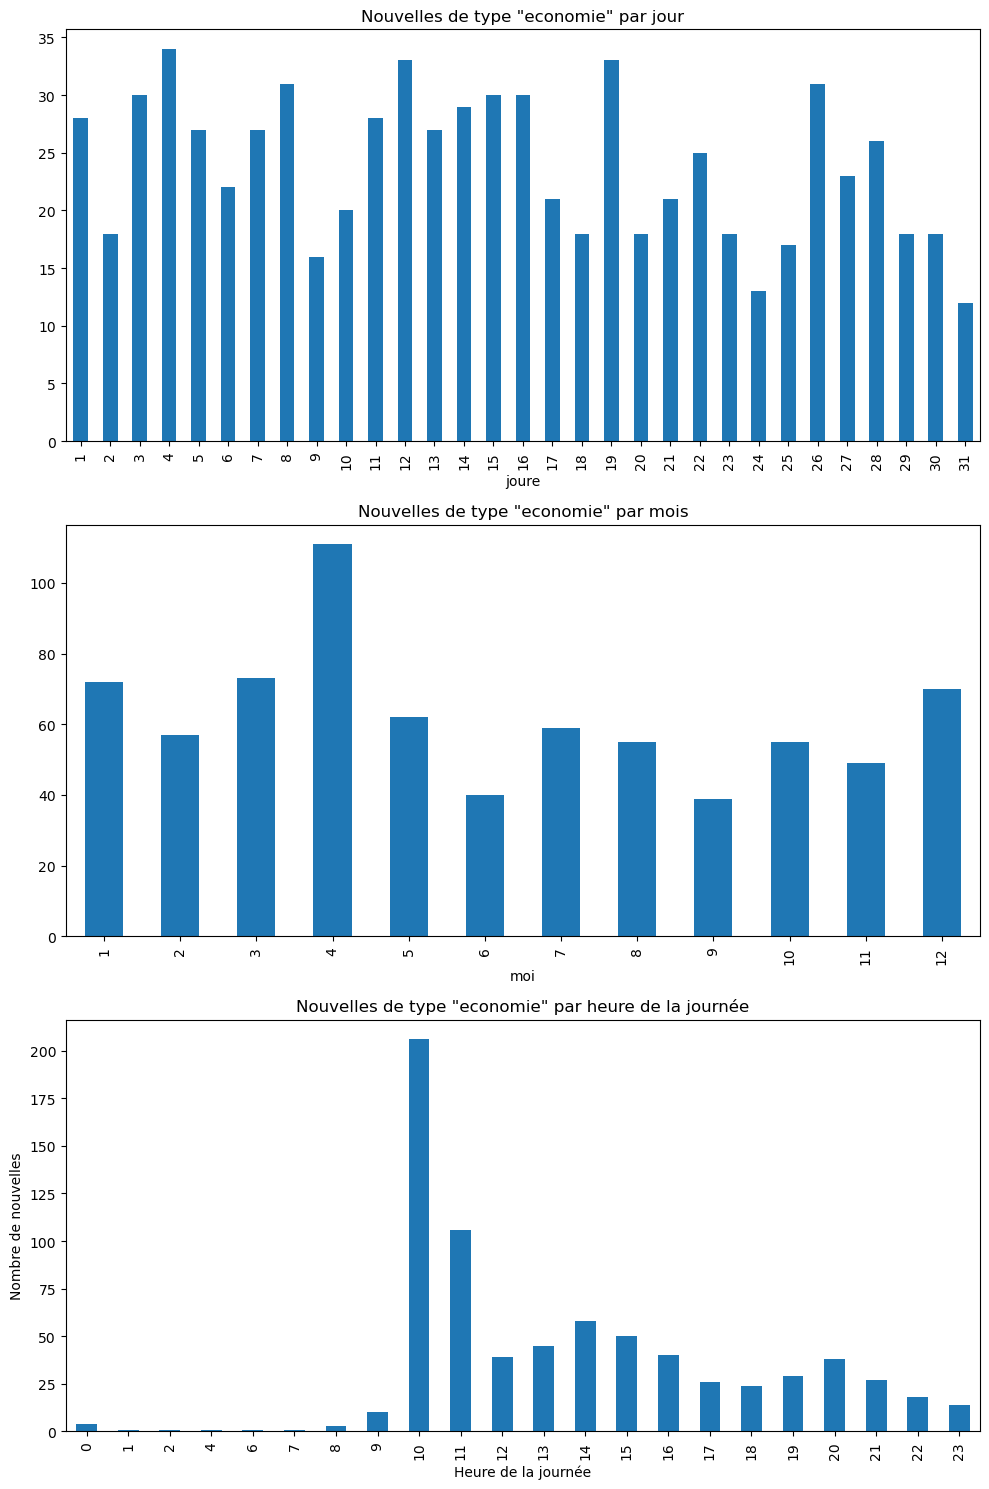

In [44]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'economie']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "economie" par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "economie" par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "economie" par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\912219975.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


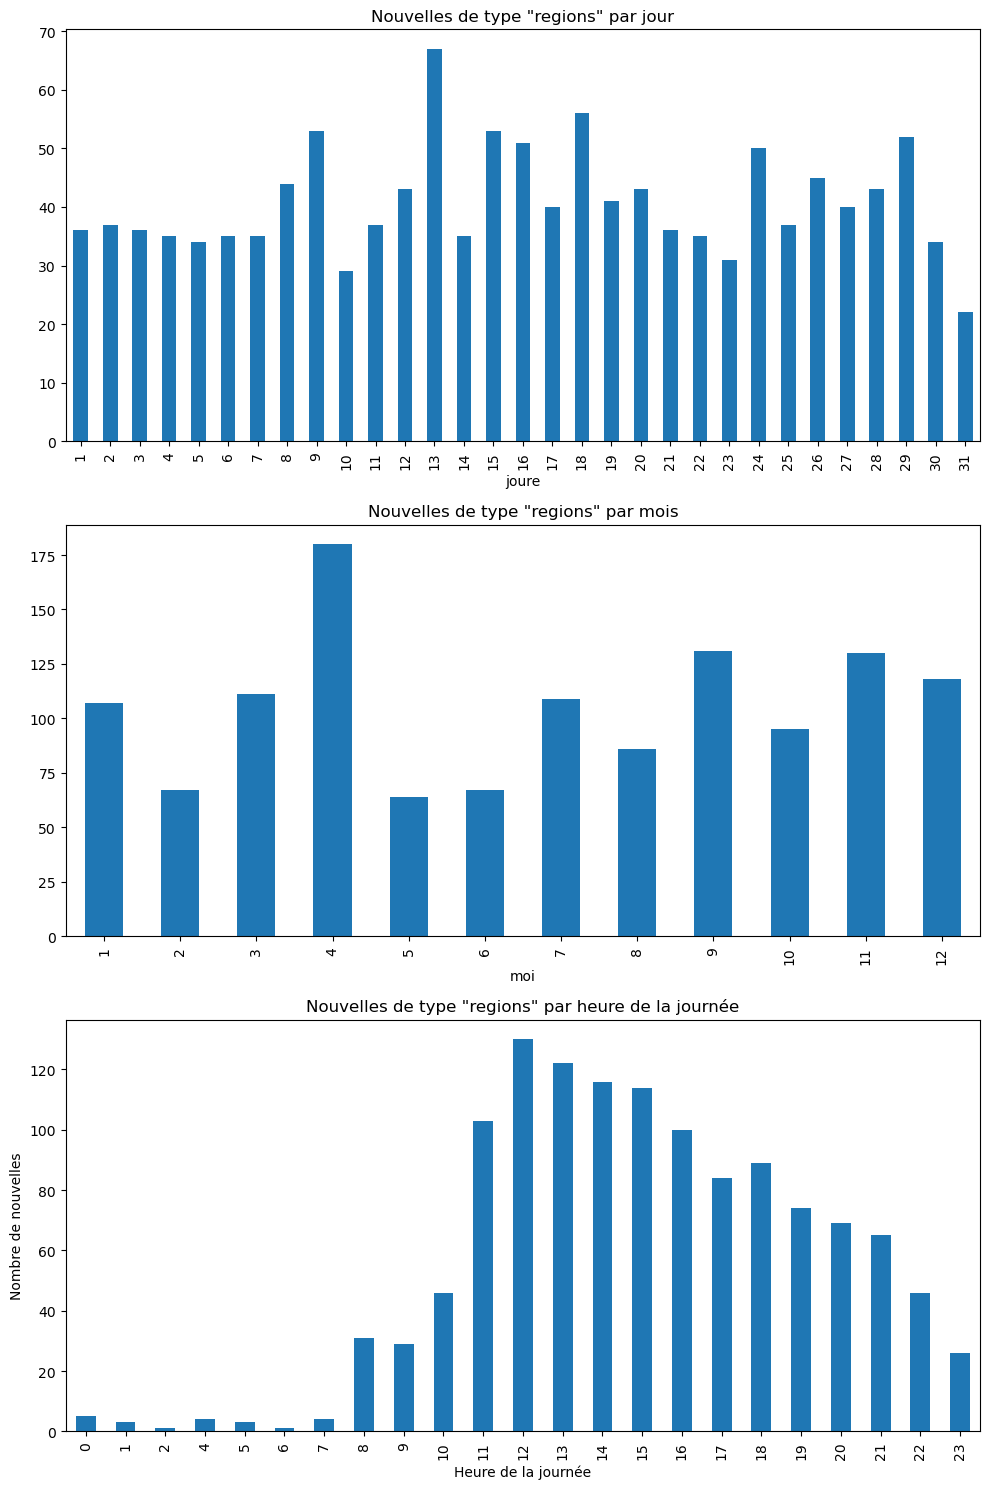

In [45]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'regions']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "regions" par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "regions" par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "regions" par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\1991524711.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


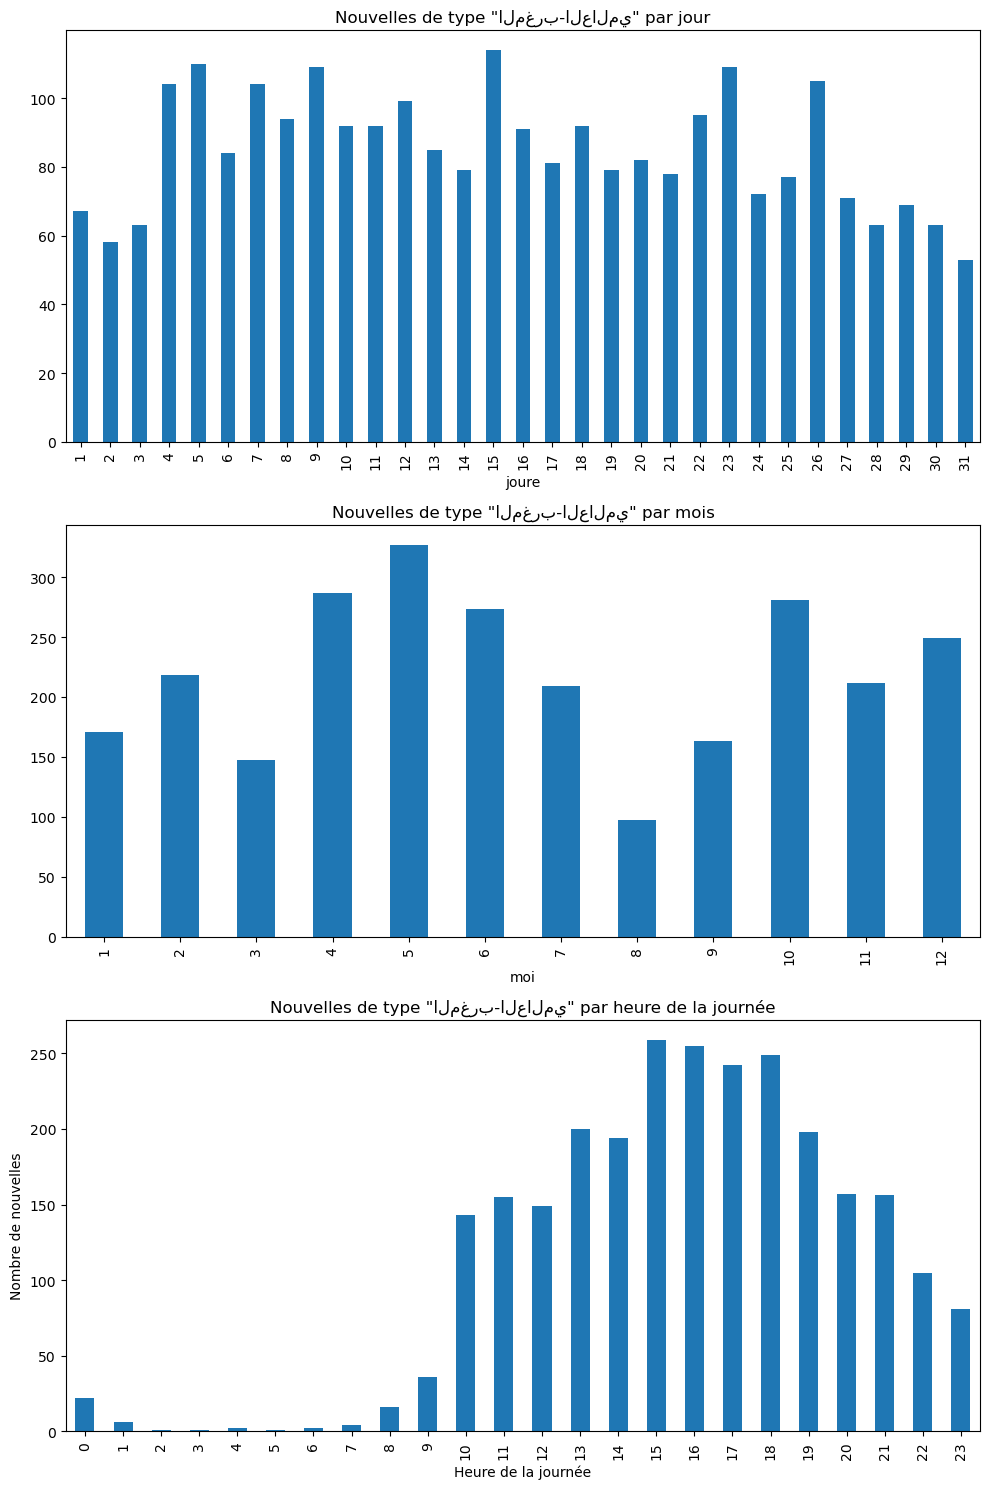

In [46]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'المغرب-العالمي']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "المغرب-العالمي" par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "المغرب-العالمي" par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "المغرب-العالمي" par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7756\1222977766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sante['Hour'] = df_sante['DateTime'].dt.hour


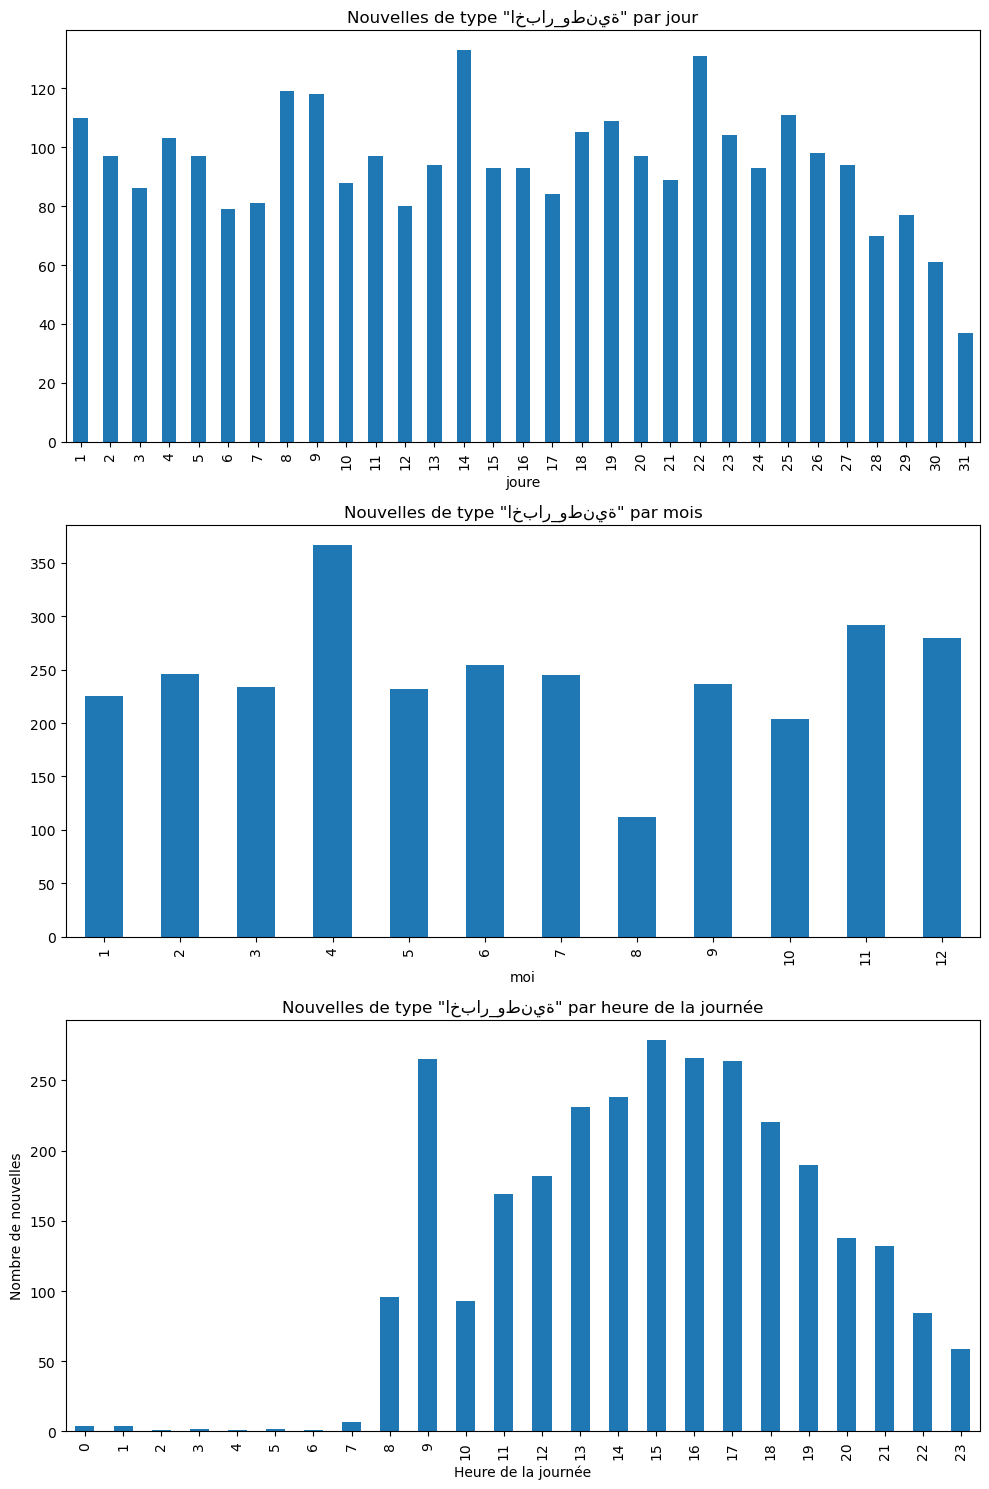

In [47]:
# Filtrer les données pour le type de news 'صحة'
df_sante = df[df['type_news'] == 'اخبار_وطنية']

# Créer une figure avec 3 sous-graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graphique pour les types de news en fonction du jour
df_sante.groupby('joure').size().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nouvelles de type "اخبار_وطنية" par jour')

# Graphique pour les types de news en fonction du mois
df_sante.groupby('moi').size().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Nouvelles de type "اخبار_وطنية" par mois')

# Graphique pour les types de news en fonction de l'heure
df_sante['Hour'] = df_sante['DateTime'].dt.hour
hourly_news_counts = df_sante.groupby('Hour').size()
hourly_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Nouvelles de type "اخبار_وطنية" par heure de la journée')
axes[2].set_xlabel('Heure de la journée')
axes[2].set_ylabel('Nombre de nouvelles')

plt.tight_layout()
plt.show()
